In [3]:
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

import seaborn as sns 



In [4]:
df = pd.read_csv("in.csv")

In [5]:
df.head()

,Year,Month,Customer Segment,Region,KPI,Value Type,Value,Unnamed: 7,Unnamed: 8
0,2020,12,Clients,India,Lv1_Visitors,Actuals,"2,66,211",NaN,NaN
1,2020,12,Clients,India,Lv2_Visitors,Actuals,"26,89,569",NaN,NaN
2,2020,12,Clients,India,Lv3_Visitors,Actuals,"13,00,571",NaN,NaN
3,2020,12,Clients,India,Lv4_Visitors,Actuals,NaN,NaN,NaN
4,2020,12,Clients,India,Lv3_Visitors,Actuals,"7,06,677",NaN,NaN


In [6]:
df = df.iloc[:,[0,1,2,3,4,5,6]]

In [7]:
df.head()

,Year,Month,Customer Segment,Region,KPI,Value Type,Value
0,2020,12,Clients,India,Lv1_Visitors,Actuals,"2,66,211"
1,2020,12,Clients,India,Lv2_Visitors,Actuals,"26,89,569"
2,2020,12,Clients,India,Lv3_Visitors,Actuals,"13,00,571"
3,2020,12,Clients,India,Lv4_Visitors,Actuals,NaN
4,2020,12,Clients,India,Lv3_Visitors,Actuals,"7,06,677"


# part 0

DATA PREP

In [8]:
df.isnull().sum()

Year                 0
Month                0
Customer Segment     0
Region               0
KPI                  0
Value Type           0
Value               25
dtype: int64

<Axes: >

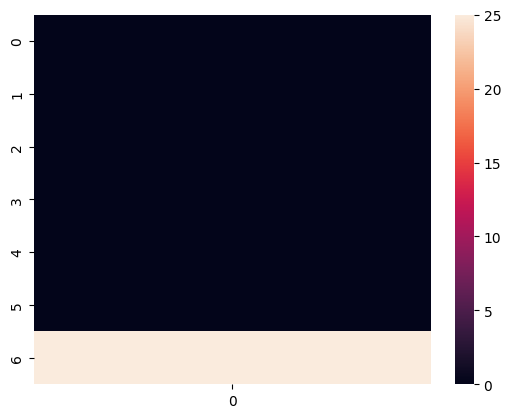

In [9]:
mask = df.isnull().sum()
mask = np.expand_dims(mask, axis=1)  

sns.heatmap(mask)

removing null values 

In [10]:
 for i in df.columns :
        
        if df[i].dtype == "int64" :
            
            mean = df[i].mean()
            
            df.fillna(mean,inplace = True)
            

In [11]:
df.isnull().sum()

Year                0
Month               0
Customer Segment    0
Region              0
KPI                 0
Value Type          0
Value               0
dtype: int64

<Axes: >

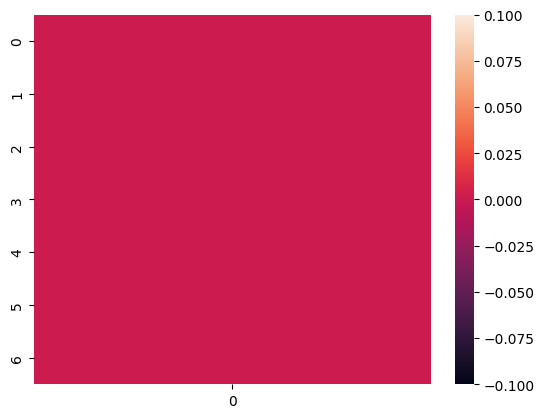

In [12]:
mask = df.isnull().sum()
mask = np.expand_dims(mask, axis=1)  

sns.heatmap(mask)

In [13]:
df.iloc[:,2].unique()

array(['Clients', 'Customers'], dtype=object)

In [14]:
df.iloc[:,3].unique()

array(['India', 'Uddepy', 'Dehradun', 'Ujjain', 'Indore', 'Faridabad',
       'Aurangabad'], dtype=object)

In [15]:
df.iloc[:,4].unique()

array(['Lv1_Visitors', 'Lv2_Visitors', 'Lv3_Visitors', 'Lv4_Visitors',
       'Lv5_Visitors'], dtype=object)

# part 1

In [16]:
df1 = df["KPI"] == "Lv1_Visitors"

len(df[df1])



300

In [17]:
df2 = df["KPI"] == "Lv2_Visitors"

len(df[df2])



300

In [18]:
df3 = df["KPI"] == "Lv3_Visitors"

len(df[df3])



324

In [19]:
df4 = df["KPI"] == "Lv4_Visitors"

len(df[df4])



324

In [20]:
df5 = df["KPI"] == "Lv5_Visitors"

len(df[df5])



324

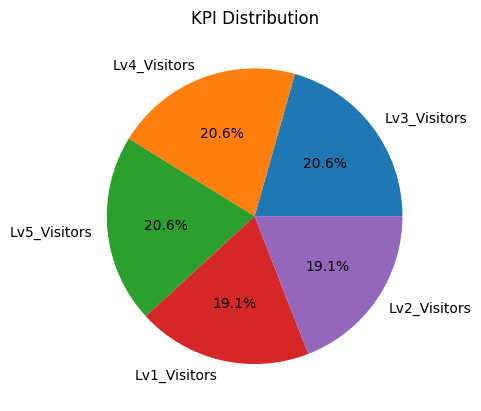

In [21]:
kpi_counts = df["KPI"].value_counts()

# Create a pie chart based on the counts
plt.pie(kpi_counts, labels=kpi_counts.index, autopct='%1.1f%%')
plt.title("KPI Distribution")
plt.show()


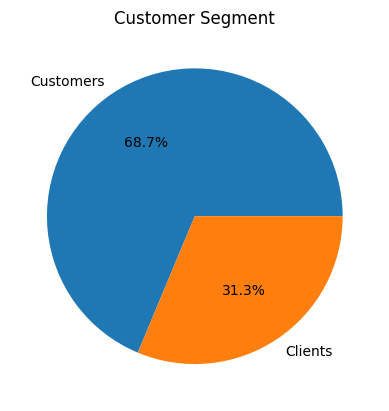

In [22]:
Customer_Segment = df["Customer Segment"].value_counts()

# Create a pie chart based on the counts
plt.pie(Customer_Segment, labels=Customer_Segment.index, autopct='%1.1f%%')
plt.title("Customer Segment")
plt.show()


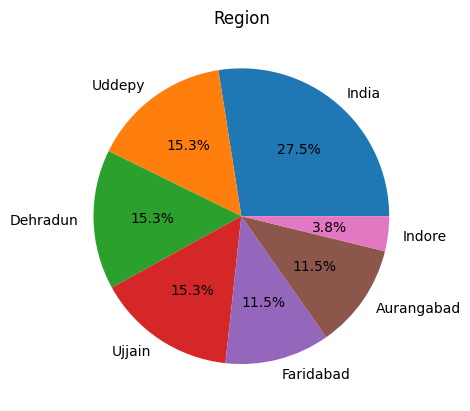

In [23]:
Region = df["Region"].value_counts()

# Create a pie chart based on the counts
plt.pie(Region, labels=Region.index, autopct='%1.1f%%')
plt.title("Region")
plt.show()


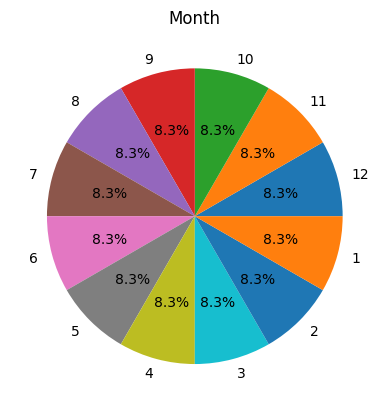

In [24]:
Month = df["Month"].value_counts()

# Create a pie chart based on the counts
plt.pie(Month, labels=Month.index, autopct='%1.1f%%')
plt.title("Month")
plt.show()


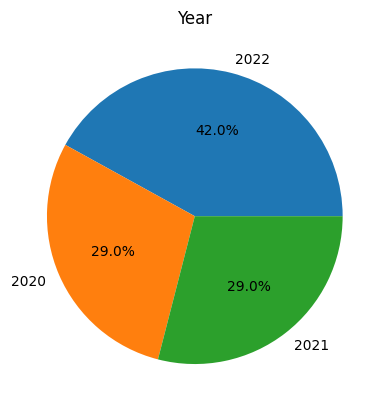

In [25]:
Year  = df["Year"].value_counts()

# Create a pie chart based on the counts
plt.pie(Year, labels=Year.index, autopct='%1.1f%%')
plt.title("Year")
plt.show()


In [26]:

# Assuming df is your DataFrame and 'Quantitative_Variable' is the variable you want to analyze
quantitative_variable = 'Value'

df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Calculate Q1 and Q3
Q1 = df[quantitative_variable].quantile(0.25)
Q3 = df[quantitative_variable].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Identify and remove outliers
df = df[(df[quantitative_variable] >= lower_threshold) & (df[quantitative_variable] <= upper_threshold)]


In [27]:
df.skew()

C:\Users\tanmay pandey\AppData\Local\Temp\ipykernel_5884\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Year    -0.475228
Month   -0.316123
Value    0.306060
dtype: float64

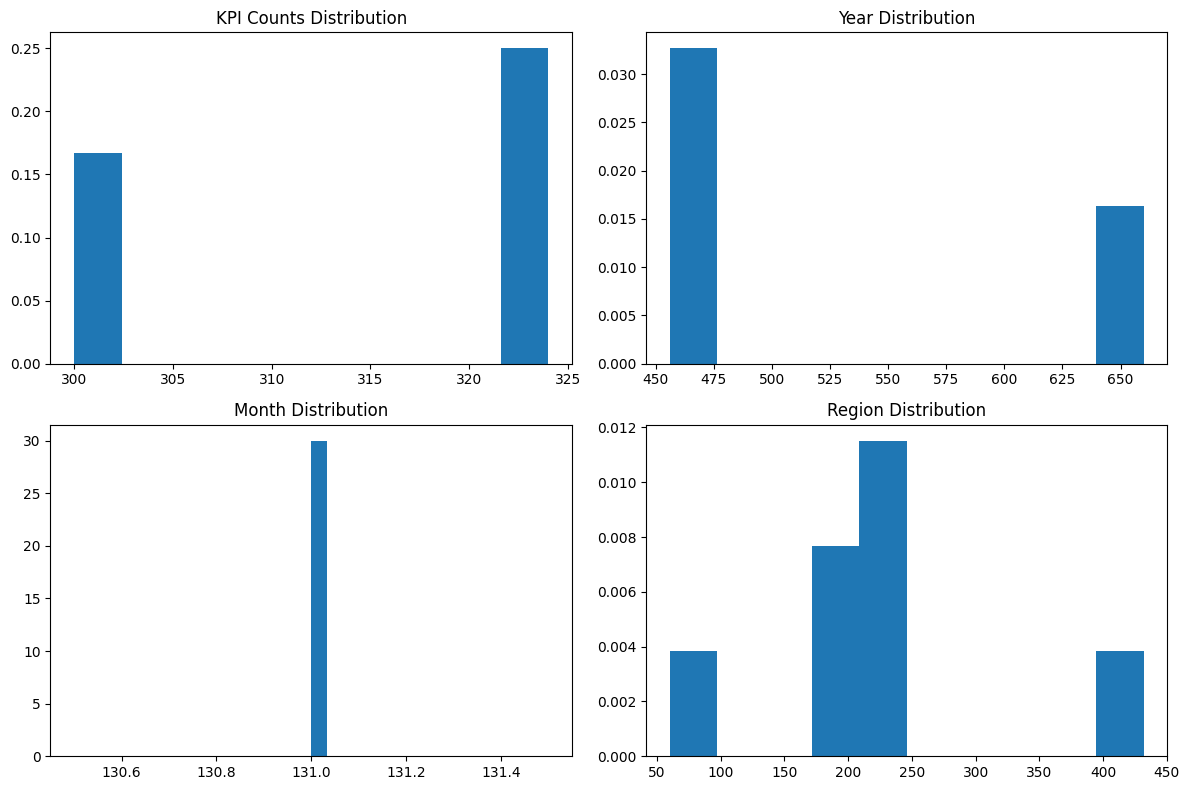

In [28]:
# Assuming you have variables kpi_counts, Year, Month, and Region

# Create subplots to display histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms for kpi_counts, Year, Month, and Region
axes[0, 0].hist(kpi_counts, density=True, bins=10)
axes[0, 0].set_title('KPI Counts Distribution')

axes[0, 1].hist(Year, density=True, bins=10)
axes[0, 1].set_title('Year Distribution')

axes[1, 0].hist(Month, density=True, bins=30)
axes[1, 0].set_title('Month Distribution')

axes[1, 1].hist(Region, density=True, bins=10)
axes[1, 1].set_title('Region Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [29]:


def descriptive_stats(visitor_data):
    # Create a pivot view of the total number of visitors segmented by level and year
    pivot_table = pd.pivot_table(df["KPI"], values='visitors', index=['year'], columns=['level'], aggfunc='sum', fill_value=0)
    
    # Print the original data
    print("Original Data:")
    print(visitor_data)
    
    # Print the pivot view
    print("\nPivot View - Total Visitors Segmented by Level and Year:")
    print(pivot_table)
    
    # Find the region with the maximum number of Level 5 visitors in each year
    max_level5_region = visitor_data[visitor_data.groupby('year')['visitors'].transform(max) == visitor_data['visitors']]
    
    # Print the region with the maximum Level 5 visitors in each year
    print("\nRegion with Maximum Level 5 Visitors in Each Year:")
    print(max_level5_region[['year', 'region', 'visitors']])


In [31]:


data = {
    'year': df["Year"],
    'level': df["KPI"],
    'region': df["Region"],
    'visitors': df["Value"]
}

visitor_data = pd.DataFrame(data)

# Calculate Conversion Rate (Level 5 visitors / Level 1 visitors)
visitor_data['Conversion Rate'] = visitor_data.groupby(['year', 'region'])['visitors'].transform(lambda x: x[x.index == x.idxmax()].values / x[x.index == x.idxmin()].values)

# Create a graph to visualize Conversion Rate by customer groups
plt.figure(figsize=(10, 6))
plt.bar(visitor_data['year'].astype(str) + ' - ' + visitor_data['region'], visitor_data['Conversion Rate'], color='skyblue')
plt.title('Conversion Rate by Customer Groups')
plt.xlabel('Year - Region')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()

# Identify the group with the best Conversion Rate
best_conversion_group = visitor_data[visitor_data['Conversion Rate'] == visitor_data['Conversion Rate'].max()]
print("Group with the Best Conversion Rate:")
print(best_conversion_group[['year', 'region', 'Conversion Rate']])

# Find the region performing worst in all years
worst_region = visitor_data.groupby('region')['Conversion Rate'].mean().idxmin()
print("\nRegion Performing Worst in All Years:", worst_region)

# Prescribe possible reasons for the worst-performing region
# You can analyze the data further to identify the reasons for poor performance in the worst region.

# Identify the region with better Year-On-Year growth
yearly_growth = visitor_data.groupby(['year', 'region'])['Conversion Rate'].mean().unstack()
yearly_growth['YoY Growth'] = yearly_growth.pct_change(axis=1).mean(axis=1)
best_yoy_region = yearly_growth['YoY Growth'].idxmax()
print("\nRegion with Better Year-On-Year Growth:", best_yoy_region)


ValueError: Length of values (1) does not match length of index (5)

In [32]:


def descriptive_stats(visitor_data):
    # Calculate the Level 5 and Level 1 visitor totals for each year and region
    pivot_table = visitor_data.pivot_table(values='visitors', index=['year', 'region'], columns='level', aggfunc='sum', fill_value=0)
    
    # Calculate Conversion Rate (Level 5 visitors / Level 1 visitors) for each group
    pivot_table['Conversion Rate'] = pivot_table[5] / pivot_table[1]
    
    # Print the original data
    print("Original Data:")
    print(visitor_data)
    
    # Print the pivot view
    print("\nPivot View - Total Visitors Segmented by Level and Year:")
    print(pivot_table)
    
    # Find the region with the maximum number of Level 5 visitors in each year
    max_level5_region = visitor_data[visitor_data.groupby('year')['visitors'].transform(max) == visitor_data['visitors']]
    
    # Print the region with the maximum Level 5 visitors in each year
    print("\nRegion with Maximum Level 5 Visitors in Each Year:")
    print(max_level5_region[['year', 'region', 'visitors']])


In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

def predict_future(visitor_data):
    # Create a time series DataFrame with date as the index
    visitor_data['date'] = pd.to_datetime(visitor_data['year'], format='%Y') + pd.to_timedelta(visitor_data['month'] - 1, unit='M')
    visitor_data.set_index('date', inplace=True)
    
    # Extract Level 5 and Level 1 time series data for forecasting
    level5_series = visitor_data[visitor_data['level'] == 5]['visitors']
    level1_series = visitor_data[visitor_data['level'] == 1]['visitors']
    
    # Perform Exponential Smoothing forecasting for Level 5 and Level 1
    model_level5 = ExponentialSmoothing(level5_series, trend='add', seasonal='add', seasonal_periods=12)
    model_level1 = ExponentialSmoothing(level1_series, trend='add', seasonal='add', seasonal_periods=12)
    
    fit_level5 = model_level5.fit()
    fit_level1 = model_level1.fit()
    
    # Predict the next 12 months for Level 5 and Level 1
    forecast_level5 = fit_level5.forecast(steps=12)
    forecast_level1 = fit_level1.forecast(steps=12)
    
    # Calculate MAPE and RMSE for Level 5 and Level 1 predictions
    mape_level5 = mean_absolute_error(level5_series[-12:], forecast_level5)
    rmse_level5 = np.sqrt(mean_squared_error(level5_series[-12:], forecast_level5))
    mape_level1 = mean_absolute_error(level1_series[-12:], forecast_level1)
    rmse_level1 = np.sqrt(mean_squared_error(level1_series[-12:], forecast_level1))
    
    # Create a line graph to visualize actual and predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(visitor_data.index[-36:], level5_series[-36:], label='Actual Level 5', marker='o')
    plt.plot(pd.date_range(start='2022-01-01', periods=12, freq='M'), forecast_level5, label='Predicted Level 5', marker='x')
    
    plt.plot(visitor_data.index[-36:], level1_series[-36:], label='Actual Level 1', marker='o')
    plt.plot(pd.date_range(start='2022-01-01', periods=12, freq='M'), forecast_level1, label='Predicted Level 1', marker='x')
    
    plt.title('Actual vs. Predicted Level 5 and Level 1 Visitors')
    plt.xlabel('Date')
    plt.ylabel('Visitors')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print MAPE and RMSE for Level 5 and Level 1
    print("MAPE for Level 5:", mape_level5)
    print("RMSE for Level 5:", rmse_level5)
    print("MAPE for Level 1:", mape_level1)
    print("RMSE for Level 1:", rmse_level1)

# Sample visitor data (replace this with your actual data)


visitor_data = pd.DataFrame(data)

# Call the predict_future function
predict_future(visitor_data)


ModuleNotFoundError: No module named 'statsmodels'

In [34]:
import numpy as np
import pandas as pd
from scipy import stats


# Create a DataFrame from the data
df = pd.DataFrame(data)

# Calculate CTR (Click-Through Rate)
df['CTR'] = df['Clicks'] / df['Visitors']

# Split the data into control and treatment groups
control_group = df[df['Group'] == 'Control']['CTR']
treatment_group = df[df['Group'] == 'Treatment']['CTR']

# Set the significance level (alpha)
alpha = 0.05

# Perform a two-sample t-test (assuming CTR follows a normal distribution)
t_statistic, p_value = stats.ttest_ind(control_group, treatment_group)

# Determine if the null hypothesis should be rejected
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant difference in CTR between groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in CTR between groups.")

# Print the test results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


KeyError: 'Clicks'